Alex Gagliano, 05/10/2020

Let's start by importing our required packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from astropy.time import Time
from collections import Counter

sns.set_context("talk")
sns.set_style("white")
sns.set_palette("colorblind")


plt.rcParams['xtick.major.size'] = 16
plt.rcParams['ytick.major.size'] = 16

plt.rcParams['xtick.minor.size'] = 8
plt.rcParams['ytick.minor.size'] = 8
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.minor.width'] = 2

plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

In [2]:
t0 = 58854.2

In [3]:
#data = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/data/photometry/2020oiphotometry_clean_wUVOT.csv")
data = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/data/photometry/2020oiphotometry_wSynthetic_wForcedZTF_wLCOu_final.csv")

#Looks a lot cleaner! How many bands do we have from the public data? 

Text(0, 0.5, 'Magnitude')

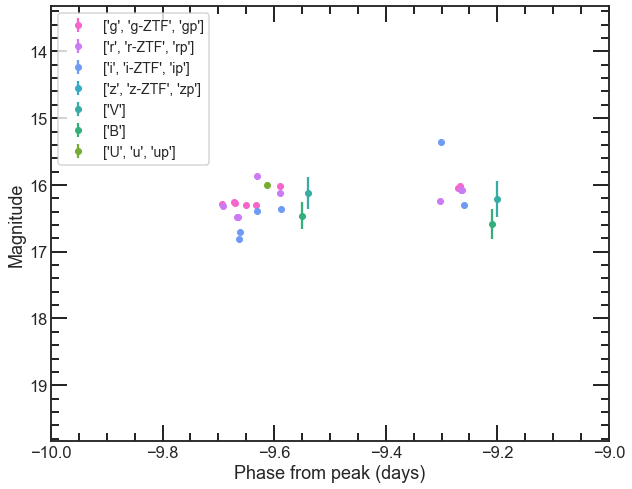

In [4]:
data_plt = data
#data_plt.loc[data_plt['FLT'] == 'g-ZTF', 'FLT'] = 'g'
#data_plt.loc[data_plt['FLT'] == 'gp', 'FLT'] = 'g'
#data_plt.loc[data_plt['FLT'] == 'up', 'FLT'] = 'u'
#data_plt.loc[data_plt['FLT'] == 'ip', 'FLT'] = 'i'
#data_plt.loc[data_plt['FLT'] == 'rp', 'FLT'] = 'r'
#data_plt.loc[data_plt['FLT'] == 'r-ZTF', 'FLT'] = 'r'

colors = sns.husl_palette(10)
#sns.hls_palette(8, l=.3, s=.8)
colors.reverse()
plt.figure(figsize=(10,8))
#bands = [['g', 'g-ZTF', 'gp'],['r', 'r-ZTF', 'rp'],['i', 'i-ZTF', 'ip'],['z', 'z-ZTF', 'zp']]
#bands = [['g', 'g-ZTF', 'gp'],['r', 'r-ZTF', 'rp'],['i', 'i-ZTF', 'ip'],['z', 'z-ZTF', 'zp'], ['V'], ['B'], ['UVW1'], ['U', 'u', 'up']]
bands = [['g', 'g-ZTF', 'gp'],['r', 'r-ZTF', 'rp'],['i', 'i-ZTF', 'ip'],['z', 'z-ZTF', 'zp'], ['V'], ['B'], ['U','u', 'up']]
#bands = [['g', 'g-ZTF', 'gp'],['r', 'r-ZTF', 'rp'],['i', 'i-ZTF', 'ip'], ['B']]
#bands = [['g', 'g-ZTF', 'gp'],['r', 'r-ZTF', 'rp'],['i', 'i-ZTF', 'ip'],]
#bands = [['g', 'g-ZTF', 'gp']]

j = 0
clean_data = []
for i in np.arange(len(bands)):
    band = bands[i]
    tmp = data_plt[data_plt['FLT'].isin(band)]
    if band == ['U','u', 'up']:
        tmp = tmp[~tmp['TELESCOPE'].isin(['Swift'])]
        tmp_early = tmp[(tmp['MJD']-58866) < 0]
        tmp_late = tmp[(tmp['MJD']-58866) > 0]
        tmp_late = tmp_late[tmp_late['MAGERR'] < 0.5]
        tmp = pd.concat([tmp_early, tmp_late],ignore_index=True)
    elif band == ['UVW1']:
        tmp = tmp[tmp['MAGERR'] < 1.]
        tmp = tmp[tmp['MJD']-58866 < 20.]
    else:
        if (band == ['z', 'z-ZTF', 'zp']):
            tmp = tmp[tmp['MAGERR'] < 0.5]
        elif (band == ['B']) | (band ==['V']):
            tmp_early = tmp[(tmp['MJD']-58866) < 0]
            tmp_late = tmp[(tmp['MJD']-58866) > 0]
            tmp_late = tmp_late[tmp_late['MAGERR'] < 0.05]
            tmp = pd.concat([tmp_early, tmp_late],ignore_index=True)
        else:
            tmp = tmp[tmp['MAGERR'] < 0.05]
    tmp = tmp[tmp['MAG'] > 13.5]
    if(len(tmp)) > 2:
        clean_data.append(tmp)
        plt.errorbar(tmp['MJD']-58866.0, tmp['MAG'], tmp['MAGERR'], fmt='o', c=colors[i], label=band,ms=6)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()
plt.xlim((-10,-9))
plt.xlabel("Phase from peak (days)")
plt.ylabel("Magnitude")
#plt.savefig("Magnitude_UVOT_phase_drop_u.png", bbox_inches='tight', dpi=300)

In [5]:

#tmp.sort_values(by='MJD')['MJD'].values[4]

In [6]:
#len(data)

In [7]:
#data = data[data["MJD"]!= 58856.69851079861]
#data.to_csv("/Users/alexgagliano/Documents/Research/2020oi/data/photometry/2020oiphotometry_clean_wUVOT.csv", index=False)

In [8]:
#tmp.loc[np.abs(tmp['MJD'] - 58856.452164)<0.001, 'MJD'].values[0]

In [9]:
clean_data = pd.concat(clean_data, ignore_index=True)
clean_data = clean_data[(clean_data['MJD']-58866)<51.]
clean_data= clean_data[(clean_data['MJD'] - 58866)>-50]
#clean_data.to_csv("/Users/alexgagliano/Documents/Research/2020oi/data/photometry/2020oi_GPpreprocessing_SidingSpring.csv",index=False)

In [10]:
data = clean_data

To start looking into a GP, let's first consider the r-band, which should have some of the most data. We're going to consolidate data collected in 'rp', 'r-ZTF', and 'r' band - these are instrument specific names for similar bands (is this fair game to do?). 

In [11]:
bands_list = [['g', 'g-ZTF', 'gp'],['r', 'r-ZTF', 'rp'],['i', 'i-ZTF', 'ip'],['z', 'z-ZTF', 'zp'], ['V'], ['B'], ['u']]
#bands = ['i', 'i-ZTF', 'ip']
#bands = ['rp', 'r-ZTF', 'r']
bands = ['gp', 'g-ZTF', 'g']

oneBand = data[data['FLT'].isin(bands)]
#newData = newData[newData['FLT'].isin(bands)]
oneBand.sort_values(by=['MJD'], inplace=True)
#oneBand = oneBand[oneBand['MAGERR'] < 0.03]
oneBand = oneBand[oneBand['MJD'] > 58800]
oneBand = oneBand[oneBand['MAG'] > 13.8]
oneBand = oneBand[~oneBand['MJD'].isin([58856.368, 58874.282, 58880.28317901, 58887.383 , 58906.1, 58910.159,58880.2831790133, 58910.15900000001, 58856.307])]
oneBand.loc[(oneBand['MJD']<58890) & (oneBand['MJD']>58880) & (oneBand['MAG']<16.0), 'MAG'] += 0.5 #hacky, but just to create the mean model
oneBand.dropna(subset=['MAG'])
oneBand.sort_values(by=['MAG'], inplace=True)
#combine online data plus newly reduced Swope photometry
#oneBand = pd.concat([oneBand, newData])
#make sure our observations are unique
oneBand.drop_duplicates(subset=['MJD', 'MAG'], inplace=True)

/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


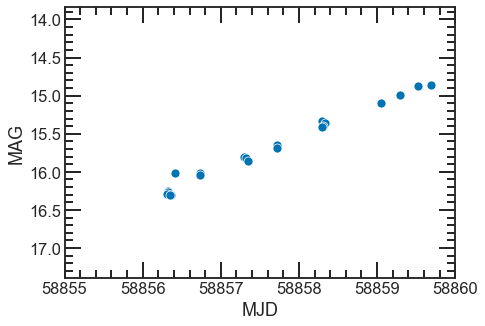

In [12]:
#get rid of the weird data for the sake of getting a clean fit
plt.figure(figsize=(7,5))
sns.scatterplot(x='MJD', y='MAG',data=oneBand);
plt.xlim((58855, 58860))
#sns.scatterplot(x='MJD', y='MAG',data=oneBand_subset, color='k');
plt.gca().invert_yaxis()

(17.0, 14.0)

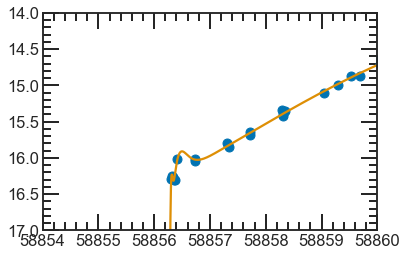

In [13]:
from scipy.interpolate import splev, splrep
oneBand.sort_values(by='MJD', inplace=True)
x = oneBand['MJD'].values
y = oneBand['MAG'].values

def fit(xnew, scale, up):
    w = np.ones(len(x))*10
    w[x<58858] = 60.
    w[np.abs(x-58864.48)<3.] = 50.
    
    ytemp = y.copy()
    ytemp[(x<58857)&(x>=x[0])] -= scale
    ytemp -= up
    spl = splrep(x, ytemp, w=w, k=5)

    #x2 = np.linspace(58854, 58900, num=10000)
    y2 = splev(xnew, spl)
    return y2

x2 = np.linspace(58854, 58900, num=10000)

#f = splev
#y2 = f(x2,spl)
#plt.plot(x, y, 'o', x2, y2)
plt.plot(x,y,'o', x2, fit(x2, 0.0, 0.0))
plt.xlim((58854, 58860))
plt.ylim((17, 14))

When does the supernova peak in the 'r'? 

In [14]:
peakTime = oneBand.loc[oneBand['MAG'] == np.min(oneBand['MAG']), 'MJD'].values[0]

For fitting, we now separate into rise, peak, and fall components of the supernova lightcurve. 

In [15]:
#get the points with lowest error
oneBand.sort_values(by=['MJD'], inplace=True)
rise = oneBand[oneBand['MJD'] < peakTime]
peak = oneBand[np.abs(oneBand['MJD'] - peakTime) < 0.2]
fall = oneBand[oneBand['MJD'] > peakTime]

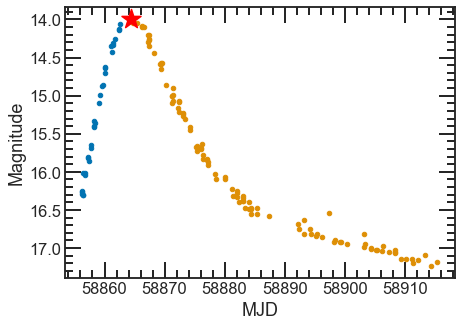

In [16]:
plt.figure(figsize=(7,5))
plt.plot(rise['MJD'], rise['MAG'], '.')
plt.scatter(peak['MJD'], peak['MAG'], marker='*', s=400, zorder=100, c='r')
plt.plot(fall['MJD'], fall['MAG'], '.')
plt.xlabel("MJD")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

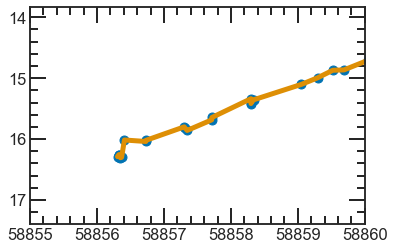

In [17]:
from scipy.signal import savgol_filter
xhat, yhat = savgol_filter((oneBand['MJD'], oneBand['MAG']), 3, 2) # window size 17, polynomial order 2
plt.plot(oneBand['MJD'], oneBand['MAG'], 'o')
plt.plot(xhat, yhat, lw=5)
plt.xlim((58855, 58860))
plt.gca().invert_yaxis()

(17.0, 14.0)

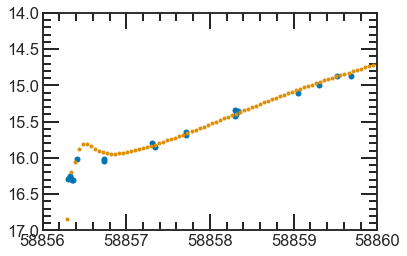

In [18]:
#plt.plot(xnew, ynew, 'o', markersize=3)
#f = fit(oneBand['MJD'], [3,1])
plt.plot(oneBand['MJD'], oneBand['MAG'], 'o', markersize=5)
plt.plot(np.linspace(58856, 58880, num=500), fit(np.linspace(58856, 58880, num=500), 0.1, 0.0), 'o', markersize=3)
plt.gca().invert_yaxis()
plt.xlim((58856, 58860))
plt.ylim(17, 14)

And, fitting both the rise and decline: 

A pretty good fit! This will serve as our mean model for this data - we'll now use George to create a gaussian process to fit the data a little more closely. 

In [19]:
import george
from george.modeling import Model
from scipy import interpolate

class MeanModel(Model):
    parameter_names = ('translate', 'shift', 'up')
    def get_parameter_vector(self):
        return np.array([self.translate, self.shift, self.up])
    def set_vector(self, vec):
        self.translate = vec[0]
        self.shift = vec[1]
        self.up = vec[2]
    def set_parameter_vector(self, vec): 
        return set_vector(self, vec)
    def get_value(self, time):
        ynew = fit(time+self.translate, self.shift, self.up)
        return ynew

In [20]:
#our starting vector will be composed of the best-fit values for the rise and the decline
#p0 = [1.0, 0.0]

Text(0.5, 1.0, '2020oi, $r$-band George GP')

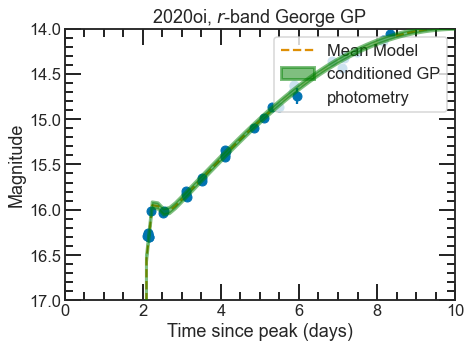

In [21]:
import scipy.optimize as op
from george import kernels

#kernel = kernels.ExpSquaredKernel(1.)
kernel = kernels.ExpSine2Kernel(gamma=0.1, log_period=5.0, ndim=1, axes=0)
#gp = george.GP(white_noise=np.log(0.19**2), fit_white_noise=True, mean=MeanModel(width=9, order=1), kernel=kernel)
gp = george.GP(white_noise=np.log(0.19**2), fit_white_noise=True, mean=MeanModel(translate=0.0, shift=0.0, up=0.0), kernel=kernel)

def lnprob(p):
    #let's make them all flat priors - 
    logBoundL = np.array([-0.3, -0.1, -3.0])
    logBoundR = np.array([0.3, 1.0, 3.0])
    
    for i in np.arange(2):
        if (p[i] <= logBoundL[i]) or (p[i] >= logBoundR[i]):
            return -np.inf
    # Update the kernel and compute the lnlikelihood.
    gp.set_parameter_vector(p)
    return gp.lnlikelihood(oneBand['MAG'], quiet=True)

# Define the objective function (negative log-likelihood in this case).
def nll(p):
    gp.set_parameter_vector(p)
    ll = gp.log_likelihood(oneBand['MAG'].values, quiet=True)
    return -ll if np.isfinite(ll) else 1e25

# And the gradient of the objective function.
def grad_nll(p):
    gp.set_parameter_vector(p)
    return -gp.grad_log_likelihood(oneBand['MAG'].values, quiet=True)

# You need to compute the GP once before starting the optimization.
gp.compute(oneBand['MJD'].values, oneBand['MAGERR'].values)

# Run the optimization routine.
p0 = gp.get_parameter_vector()
results = op.minimize(nll, p0, jac=grad_nll, method="L-BFGS-B")

# Update the kernel and print the final log-likelihood.
gp.set_parameter_vector(results.x)

newTime = np.linspace(58856, 58930,num=500)
ypred2, cov = gp.predict(oneBand['MAG'], newTime, return_cov=True)
std = np.sqrt(np.diag(cov))

# plot the data
plt.figure(figsize=(7,5))
plt.fill_between(newTime-t0, ypred2+std, ypred2-std, color="g", lw=3, alpha=0.5, label='conditioned GP', zorder=100)
plt.errorbar(oneBand['MJD'].values-t0, oneBand['MAG'].values, oneBand['MAGERR'].values,fmt='o', label='photometry')
plt.plot(newTime-t0, fit(newTime, 0.0, 0.0), '--',label='Mean Model');
#plt.plot(rise['MJD'].values, rise['MAG'].values, 'o', label='Rise Data');
#plt.plot(fall['MJD'].values, fall['MAG'].values, 'o', label='Decline Data');
#plt.plot(peak['MJD'].values, peak['MAG'].values, '*', markersize=20, zorder=100, label='Peak');
plt.gca().invert_yaxis()
plt.xlim((0, 10))
plt.ylim(17, 14)
plt.xlabel("Time since peak (days)")
plt.ylabel("Magnitude")
plt.legend(loc='upper right');
plt.title("2020oi, $r$-band George GP")
#plt.savefig("/Users/alexgagliano/Documents/Research/2020oi/img/George_GP_Alex_0311.png",dpi=200, bbox_inches='tight')

In [22]:
bands_list = [['rp', 'r-ZTF', 'r'], ['gp', 'g-ZTF', 'g'], ['i', 'ip'], ['z'], ['V'], ['B'], ['U', 'u', 'up']]
newbands_list = bands_list[:]
cleaned_data = []
bands_idx = []
for i in np.arange(len(bands_list)):
    bands = bands_list[i]
    oneBand = data[data['FLT'].isin(bands)]
  #  newData = newData[newData['FLT'].isin(bands)]
    oneBand.sort_values(by=['MJD'], inplace=True)
    
    #combine online data plus newly reduced Swope photometry
   # oneBand = pd.concat([oneBand, newData], ignore_index=True)
    #make sure our observations are unique
    oneBand.dropna(subset=['MAG', 'MAGERR', 'MJD', 'FLT'], inplace=True)
    oneBand.drop_duplicates(subset=['MJD', 'MAG', 'FLT'], inplace=True)
    
    #only use if we have enough points for the fitting: 
    if len(oneBand) > 1:
        bands_idx.append(np.ones(len(oneBand))*i)
        cleaned_data.append(oneBand)
    else:
        newbands_list.remove(bands)
bands_idx = np.concatenate(bands_idx)
cleaned_df = pd.concat(cleaned_data, ignore_index=True)
bands_list = newbands_list

/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel impo

Finally, we construct our hierarchical gaussian process model: 

/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/george/gp.py:308: RuntimeWarning: overflow encountered in exp
  yerr = np.sqrt(self._yerr2 + np.exp(self._call_white_noise(self._x)))


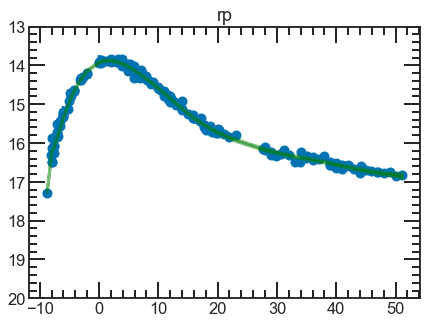

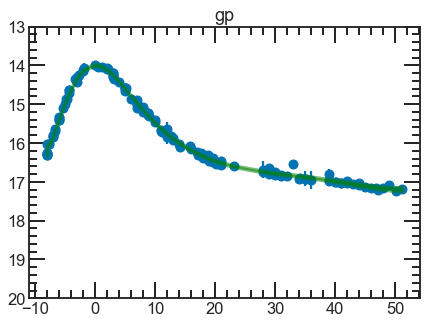

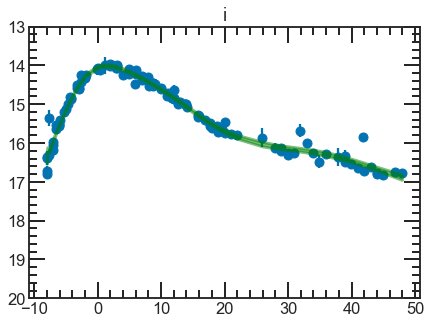

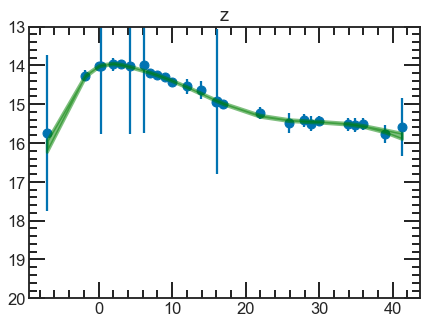

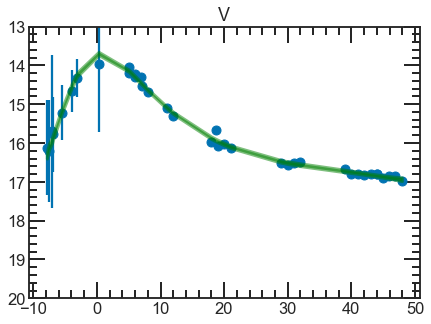

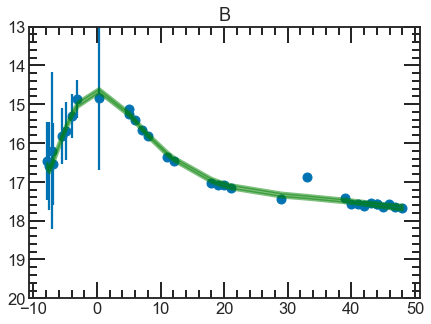

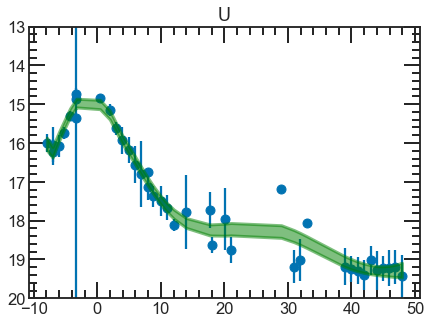

In [23]:
import scipy.optimize as op
from george import kernels

for i in np.arange(len(bands_list)):
    
    oneBand = cleaned_data[i]

    def lnprob(p):
        #let's make them all flat priors - 
        logBoundL = np.array([-0.3, -0.1, -3.0])
        logBoundR = np.array([0.3, 1.0, 3.0])

        for i in np.arange(3):
            if (p[i] <= logBoundL[i]) or (p[i] >= logBoundR[i]):
                return -np.inf
        # Update the kernel and compute the lnlikelihood.
        gp.set_parameter_vector(p)
        return gp.lnlikelihood(oneBand['MAG'], quiet=True)

    # Define the objective function (negative log-likelihood in this case).
    def nll(p):
        gp.set_parameter_vector(p)
        ll = gp.log_likelihood(oneBand['MAG'].values, quiet=True)
        return -ll if np.isfinite(ll) else 1e25

    # And the gradient of the objective function.
    def grad_nll(p):
        gp.set_parameter_vector(p)
        return -gp.grad_log_likelihood(oneBand['MAG'].values, quiet=True)

    # You need to compute the GP once before starting the optimization.
#    gp.compute(oneBand['MJD'].values, oneBand['MAGERR'].values)

#    oneBand = oneBand[oneBand['MJD'] < peakTime+40]
    #oneBand = oneBand[oneBand['MAGERR'] < 0.5]
    kernel = kernels.ExpSine2Kernel(gamma=0.1, log_period=5.0, ndim=1, axes=0)
    gp = george.GP(white_noise=np.log(0.19**2), fit_white_noise=True, mean=MeanModel(translate=0., shift=0., up=0.), kernel=kernel)
     
    # You need to compute the GP once before starting the optimization.
    gp.compute(oneBand['MJD'].values, oneBand['MAGERR'].values)

    # Run the optimization routine.
    p0 = gp.get_parameter_vector()
    results = op.minimize(nll, p0, jac=grad_nll, method="L-BFGS-B")
    
    # Update the kernel and print the final log-likelihood.
    gp.set_parameter_vector(results.x)

    ypred2, cov = gp.predict(oneBand['MAG'], oneBand['MJD'], return_cov=True)
    std = np.sqrt(np.diag(cov))

    # plot the data
    plt.figure(figsize=(7,5))
    plt.title("%s"%bands_list[i][0])
    plt.fill_between(oneBand['MJD'].values-peakTime, ypred2+std, ypred2-std, color="g", lw=3, alpha=0.5, label='conditioned GP', zorder=100)
    newTime = np.linspace(58856, 58915,num=100)
    plt.errorbar(oneBand['MJD'].values-peakTime, oneBand['MAG'].values, 5*oneBand['MAGERR'].values,fmt='o', label='both limits (default)')
    #plt.plot(newTime-peakTime, f(newTime), '--',label='Mean Model');
    plt.gca().invert_yaxis()
    plt.ylim((20, 13.))
    #plt.xlabel("Time since peak (days)")
    #plt.ylabel("Magnitude")
    #plt.legend(loc='upper right');
    #plt.title("2020oi, $r$-band George GP")
#    plt.savefig("/Users/alexgagliano/Documents/Research/2020oi/img/George_GP_Alex_%s.png"%bands_list[i][0], bbox_inches='tight')

Let's predict on new data - but we need to make sure we make the new data specific to the bands - if we try to predict far outside of the data ranges for a band, we could run into trouble.

These fits are looking pretty good, but unfortunately if we're going to use this data for bolometric fitting, we need to evaluate all our bands along the same xgrid: 

In [24]:
#cleaned_data[0] r g i z V B U UVW1 

In [25]:
#somehow got wonky
cleaned_data = [cleaned_data[6], cleaned_data[5], cleaned_data[4], cleaned_data[1], cleaned_data[0], cleaned_data[2], cleaned_data[3], cleaned_data[-1]]

['U', 'up', 'u']
[ 0.38078846  0.61396045 -1.53600009 -2.21445648  1.70553798  4.34669641]
['B']
[ 0.03075921  0.36545362 -0.01554903 -2.36299082  0.82615583  5.13463383]
['V']
[-0.05229467 -0.09906405  0.11743306 -4.89842656  0.57545047  4.612216  ]
['gp', 'g-ZTF', 'g']
[-1.46951153e-03 -4.07818161e-03  2.95550317e-02 -6.04365178e+00
  2.65702604e-01  6.26620108e+00]
['rp', 'r-ZTF', 'r']
[ 0.95383333 -1.00544563  0.0719993  -4.86153221  1.08536921  4.26783732]
['i', 'ip']
[-0.0463214   0.06406885  0.0463997  -4.01552254  1.21713614  4.15683046]
['z']
[-0.21086374 -0.04198662  0.88612693 -7.02493006  0.94535544  4.16464182]


Text(0, 0.5, 'Absolute Magnitude + Offset')

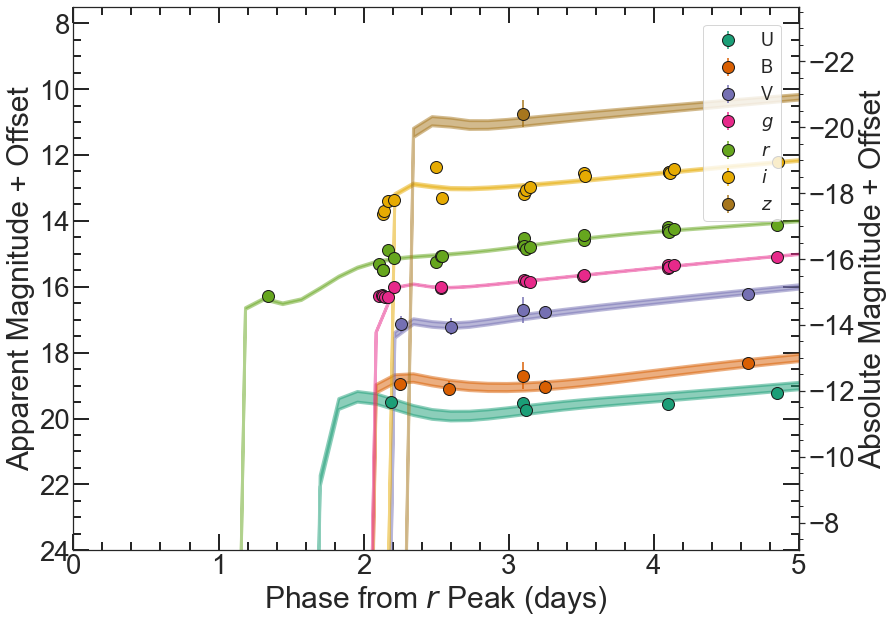

In [79]:
import scipy.optimize as op
from george import kernels
from labellines import labelLine, labelLines

peakTime = 58868.274

sns.set_style("ticks", {"xtick.major.size": 20, "ytick.major.size": 40})
sns.set_style("ticks", {"xtick.minor.size": 8, "ytick.minor.size": 8})

sns.set_context("poster")
sns.set(font_scale=2.5)
sns.set_style("white")


def app2abs(x):
    return x - 31.16 #distance modulus associated with 17.1 Mpc

def abs2app(x):
    return x + 31.16

bands_list = [['U', 'up', 'u'],['B'],['V'],['gp', 'g-ZTF', 'g'],['rp', 'r-ZTF', 'r'],  ['i', 'ip'], ['z']]
ypreds = []
ystd = []
#cols = ['red', 'tab:green','tab:blue', 'magenta']
#cols = ['tab:blue', 'tab:green', 'magenta', 'red',]
cols = sns.color_palette("Dark2", 11)
shifts = [3.5, 2.5, 1, 0, -1, -3, -5, -11]
bands = ['U', 'B', 'V', r'$g$', r'$r$', r'$i$', '$z$', 'UVW1']
fig = plt.figure(figsize=(13,10))
ax = fig.gca()

GP_phot = {}

for i in np.arange(len(bands_list)):
    print(bands_list[i])
    
    oneBand = cleaned_data[i]
    #oneBand = oneBand[oneBand['MJD'] < peakTime+44]
    
    kernel = kernels.ExpSine2Kernel(gamma=0.9, log_period=5., ndim=1, axes=0)
   ##kernel = kernel1+kernel2
    gp = george.GP(white_noise=np.log(0.5**2), fit_white_noise=True, mean=MeanModel(translate=0.04, shift=0.5, up=0.05), kernel=kernel)
    
    # You need to compute the GP once before starting the optimization.
    gp.compute(oneBand['MJD'].values, oneBand['MAGERR'].values)

    # Run the optimization routine.
    p0 = gp.get_parameter_vector()
    results = op.minimize(nll, p0, jac=grad_nll, method="L-BFGS-B")
    print(results.x)
    # Update the kernel and print the final log-likelihood.
    gp.set_parameter_vector(results.x)

    # plot the data
    newTime = np.linspace(58855., t0+65,num=500)
    oldTime = oneBand['MJD'].values
    ypred2, cov = gp.predict(y=oneBand['MAG'], t=newTime, return_cov=True)
    ypred_old, cov_old = gp.predict(y=oneBand['MAG'], t=oldTime, return_cov=True)
    #zero out, no need to go lower than this
    std = np.sqrt(np.diag(cov))
    ypred2[ypred2 > 23.] = 50

    ypreds.append(ypred2)
    ystd.append(std)
    GP_phot[bands_list[i][0] + "_LC"] = ypred2.copy()
    GP_phot[bands_list[i][0] + "_std"] = std
    
    ypred2 += shifts[i]
    plt.fill_between(newTime-t0, ypred2+std, ypred2-std, lw=3, alpha=0.5, color=cols[i])
    plt.errorbar(oneBand['MJD'].values-t0, oneBand['MAG'].values+shifts[i], oneBand['MAGERR'].values,fmt='o', c=cols[i], mec='k',ms=12, label=bands[i])
    
plt.gca().invert_yaxis()

plt.xlim(xmin=0, xmax=5)
plt.ylim((24, 7.5))
plt.xlabel(r"Phase from $r$ Peak (days)")
plt.ylabel("Apparent Magnitude + Offset")
plt.gca().tick_params(axis="y",direction="out", left='on',labelleft="on")
plt.gca().tick_params(axis="x",direction="out", bottom="on",labelleft="on")
plt.gca().tick_params(axis="x",which='minor',direction="out", bottom="on",labelleft="on")
plt.gca().tick_params(axis="y",which='minor',direction="out", left="on",labelleft="on")
plt.legend(loc='upper right',fontsize=18,borderaxespad=1.0);
plt.tick_params(which='major', axis='x', direction='in', top=True, bottom=True, length=16, width=2)
plt.tick_params(which='major', axis='y', direction='in', left=True, right=True, length=16, width=2)
plt.tick_params(which='minor', axis='x', direction='in', bottom=True, top=True, length=8, width=2)
plt.minorticks_on()
plt.tick_params(which='minor', axis='y', direction='in', left=True, right=True, length=8, width=2)

absMag = ax.secondary_yaxis('right', functions=(app2abs, abs2app))
absMag.set_ylabel('Absolute Magnitude + Offset')

#plt.savefig("/Users/alexgagliano/Documents/Research/2020oi/img/George_GP_ShockCoolingFit_FullCut.png", dpi=200, bbox_inches='tight')

['U', 'up', 'u']
['B']
['V']
['gp', 'g-ZTF', 'g']
['rp', 'r-ZTF', 'r']
['i', 'ip']
['z']


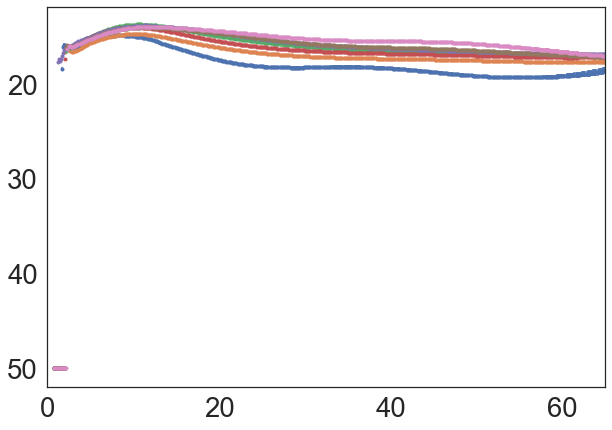

In [80]:
#say these are okay for now - take the medians, zero out where the ranges are bad
plt.figure(figsize=(10,7))
for i in np.arange(7):
    print(bands_list[i])
    ypreds[i] = np.array(ypreds[i])
    plt.errorbar(newTime-t0, ypreds[i]-shifts[i], ystd[i], fmt='.')
    plt.gca().invert_yaxis()
    plt.xlim((0, 65))
plt.show()

gpLC_u = ypreds[0]-shifts[0]
gpLC_B = ypreds[1]-shifts[1]
gpLC_V = ypreds[2]-shifts[2]
gpLC_g = ypreds[3]-shifts[3]
gpLC_r = ypreds[4]-shifts[4]
gpLC_i = ypreds[5]-shifts[5]
gpLC_z = ypreds[6]-shifts[6]
#gpLC_UVW1 = ypreds[7]-shifts[7]

gpLCu_std = ystd[0]
gpLCB_std = ystd[1]
gpLCV_std = ystd[2]
gpLCg_std = ystd[3]
gpLCr_std = ystd[4]
gpLCi_std = ystd[5]
gpLCz_std = ystd[6]
#gpLCUVW1_std = ystd[7]

In [97]:
cutoff = {'U':23., 'B':25., 'V':25., 'g':18., 'r':18., 'i':29., 'z':25., 'UVW1':25.}
ret_val = {'U':np.nan, 'B':np.nan, 'V':np.nan, 'g':np.nan, 'r':np.nan, 'i':np.nan, 'z':np.nan, 'UVW1':np.nan}

GP_results = pd.DataFrame(GP_phot)
GP_results['MJD'] = newTime

for col in GP_results.columns.values:
    if col[-1] == 'C':
        #it's a lightcurve!
        GP_results.loc[((GP_results[col] > cutoff[col[0]]) & (GP_results['MJD'] < peakTime)), col] = ret_val[col[0]]
        #turn the other values to nans
        
GP_results.to_csv("/Users/alexgagliano/Documents/Research/2020oi/data/interpolated_lcs/GPResults_2020oi_withSBO_final.csv",index=False)

In [98]:
GP_results['i_LC'] #turn the other two values to nans
GP_results.loc[(GP_results['i_LC']==ret_val['i']) & (GP_results['MJD']==58856.000000), 'i_LC'] = np.nan
GP_results.loc[(GP_results['i_LC']==ret_val['i']) & (GP_results['MJD']==58856.126653306615), 'i_LC'] = np.nan

In [95]:
GP_results.to_csv("/Users/alexgagliano/Documents/Research/2020oi/data/interpolated_lcs/GPResults_2020oi_withSBO_final.csv",index=False)

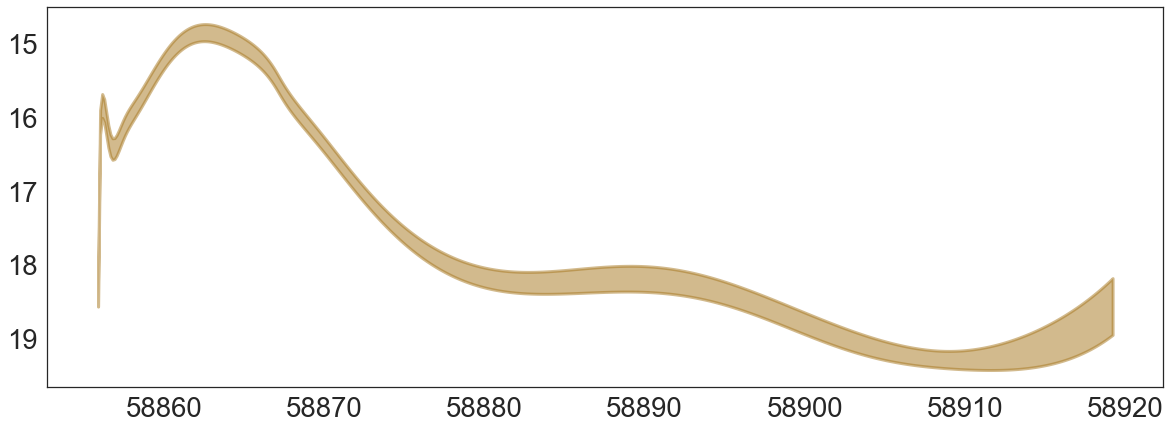

In [99]:
plt.figure(figsize=(20,7))
plt.fill_between(GP_results['MJD'], GP_results['U_LC'] - GP_results['U_std'], GP_results['U_LC'] + GP_results['U_std'],lw=3, alpha=0.5, color=cols[i])
#plt.fill_between(GP_results['MJD'], GP_results['B_LC'] - GP_results['B_std'], GP_results['B_LC'] + GP_results['B_std'],lw=3, alpha=0.5, color=cols[i])
#plt.fill_between(GP_results['MJD'], GP_results['V_LC'] - GP_results['V_std'], GP_results['V_LC'] + GP_results['V_std'],lw=3, alpha=0.5, color=cols[i])
plt.plot(data.loc[data["FLT"] == 'U', 'MJD'], data.loc[data["FLT"] == 'U', 'MAG'], 'o')
plt.gca().invert_yaxis()
#plt.ylim((17, 13))
#plt.savefig("/Users/alexgagliano/Documents/Research/2020oi/img/SBO_zBand2_Trunc.png",dpi=300,bbox_inches='tight')

As we expected, the fits are a bit worse outside of their ranges, but I think they're the best we're going to get. Taking the median posteriors as our predicted lightcurves in each band: 

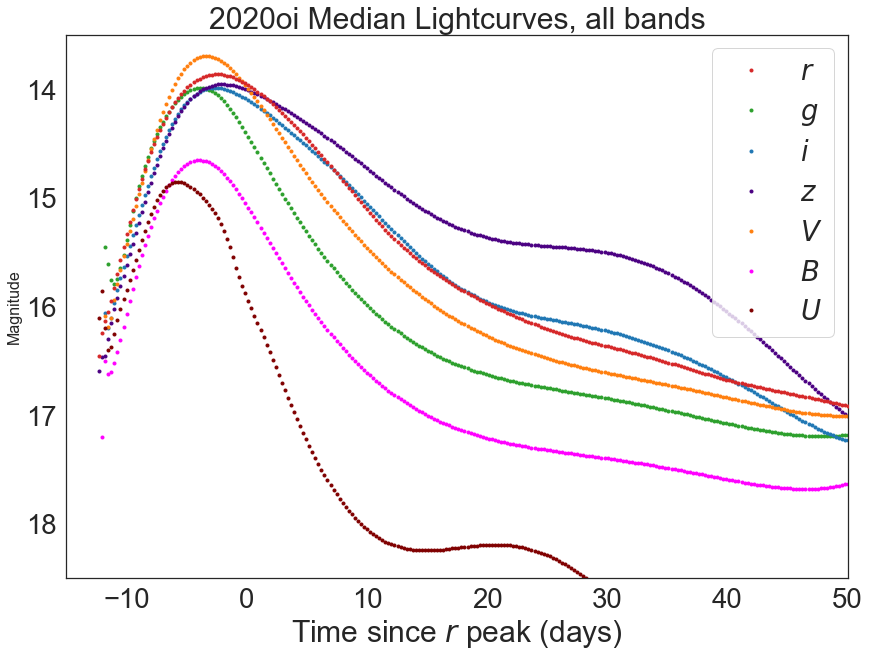

In [48]:
# plot the results
fig = plt.figure(figsize=(14,10)); ax = fig.gca()

#bol_std = np.sqrt(gpLCr_std/gpLC_r**2 + gpLCUVW2_std/gpLC_UVW2**2 + gpLCUVM2_std/gpLC_UVM2**2 +gpLCg_std/gpLC_g**2 + gpLCB_std/gpLC_B**2 + gpLCV_std/gpLC_V**2 + gpLCi_std/gpLC_i**2 + gpLCU_std/gpLC_U**2)

#['r', 'g', 'B', 'u', 'V', 'i']
plt.plot(newTime[::2]-peakTime, gpLC_r[::2], '.', label=r'$r$', color='tab:red', zorder=100)
plt.plot(newTime[::2]-peakTime, gpLC_g[::2], '.', label=r'$g$', color='tab:green')
plt.plot(newTime[::2]-peakTime, gpLC_i[::2], '.', label=r'$i$', color='tab:blue')
plt.plot(newTime[::2]-peakTime, gpLC_z[::2], '.', label=r'$z$', color='indigo')
plt.plot(newTime[::2]-peakTime, gpLC_V[::2], '.', label=r'$V$', color='tab:orange')
plt.plot(newTime[::2]-peakTime, gpLC_B[::2], '.', label=r'$B$', color='magenta')
plt.plot(newTime[::2]-peakTime, gpLC_u[::2], '.', label=r'$U$', color='maroon')
#plt.plot(newTime[::2]-peakTime, gpLC_UVW1[::2], '.', label=r'$UVW1$', color='k')

plt.xlabel(r"Time since $r$ peak (days)")
plt.ylabel("Magnitude",fontsize=16)
plt.title("2020oi Median Lightcurves, all bands")
plt.gca().invert_yaxis()
plt.xlim((-15, 50))
plt.ylim((18.5, 13.5))
plt.legend()
#plt.savefig("/Users/alexgagliano/Documents/Research/2020oi/img/MedianLCs_SBO.png", bbox_inches='tight', dpi=300)

Cool, the hard part is behind us now. We can convert our interpolated magnitudes to normalized flux, apply flux corrections to flux in each band, and use a trapezoidal interpolation method to get the bolometric lightcurve:

In [969]:
#wavelengths are the centers of each band
wavelengths = np.array([6260, 4830, 7670, 8890]) #in Angstroms
c = 3e18 #speed of light, in angstroms/s
#r g B u U UVW2 UVM2 V i
#swift U 3600
#swift S=UVW2 = 2030
#swift D=UVM2 = 2231

bol = []
fluxes_arr = []
magserr_arr = []
bol_std = np.sqrt(gpLCr_std**2 + gpLCg_std**2 + gpLCi_std**2 + gpLCz_std**2  + gpLCV_std**2 + gpLCB_std**2)
for i in np.arange(len(newTime)):
    mags = np.array([gpLC_r[i], gpLC_g[i], gpLC_i[i], gpLC_z[i]])
    magserr = np.array([gpLCr_std[i], gpLCg_std[i], gpLCi_std[i], gpLCz_std[i]])
    magserr_arr.append(magserr)
    fluxes = 10**((-mags)/2.5) # normalized flux units - do we need to apply the zeropoint??
    fluxes[0] *= 278.0 * 1.e-11  #r correction
    fluxes[1] *= 466.9 * 1.e-11 #g correction
    fluxes[2] *= 185.2 * 1.e-11 #i correction
    fluxes[3] *= 185.2 * 1.e-11 #z correction
    #get B in there! 
    fluxes_arr.append(fluxes)
    bol.append(np.trapz(fluxes[np.argsort(wavelengths)], wavelengths[np.argsort(wavelengths)]))

Let's plot it and see how we did. Here we need to convert from bolometric flux to bolometric luminosity, which we can do using the equation: 

$$ L_{bol} = F_{bol}  4 \pi d_{SN}^2$$

Where $d_{SN}$ is the distance to the supernova. SIMBAD gives a host redshift of 0.005251, corresponding to a luminosity distance of 22.7 Mpc, or 7.004e25 cm, so we'll use that. 

Our flux estimate is: 

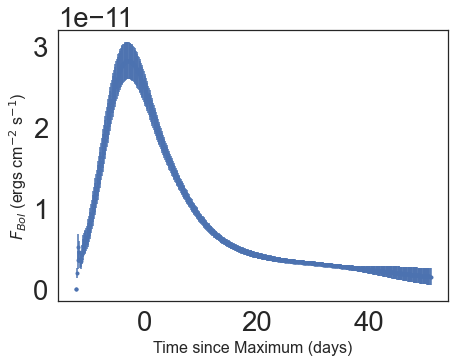

In [970]:
fig = plt.figure(figsize=(7,5)); 
ax = fig.gca()
bol_lum = np.array(bol) #ergs cm^-2 s^-1

# z~ 0.005251 corresponds to a distance of 22.7 Mpc
#error on the flux is roughly the fraction on the flux (and, consequently, the luminosity)
plt.errorbar(newTime-peakTime, bol_lum, yerr=bol_std*bol_lum, fmt='.')
plt.xlabel("Time since Maximum (days)",fontsize=16);
plt.ylabel(r"$F_{Bol}$ (ergs cm$^{-2}$ s$^{-1}$)",fontsize=16);

And our bolometric lightcurve is: 

(58855.0, 58920.0)

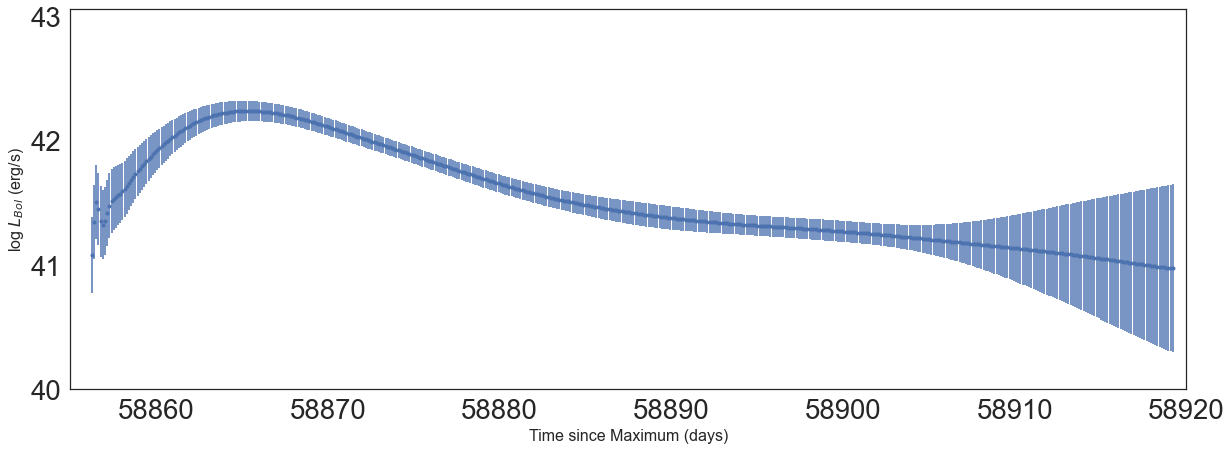

In [977]:
#fig = plt.figure(figsize=(7,5)); 
#ax = fig.gca()
bol_lum = np.array(bol) * 4 * np.pi * (7.004e25)**2 #ergs cm^-2 s^-1

# z~ 0.005251 corresponds to a distance of 22.7 Mpc
plt.figure(figsize=(20,7))
plt.errorbar(newTime, np.log10(bol_lum), bol_std, fmt='.')
#plt.yscale("log")
plt.xlabel("Time since Maximum (days)",fontsize=16);
plt.ylabel(r"log $L_{Bol}$ (erg/s)",fontsize=16);
plt.ylim(ymin=40)
plt.xlim((58855, 58920))

Let's get a rough estimate for the temperature with stefan-boltzmann, assuming a stellar radius of R~1.e15 cm (we are dealing with a massive star, after all). 

Text(0.5, 1.0, 'SN2020oi Stefan-Boltzmann Temp')

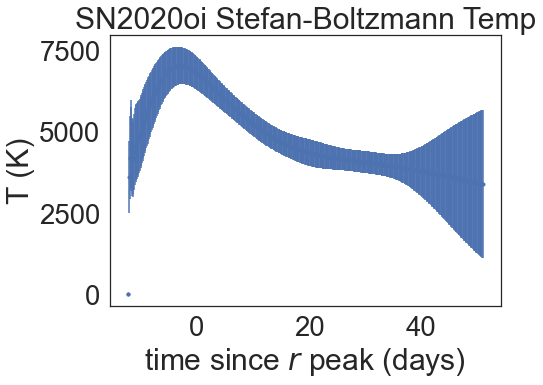

In [978]:
# Getting the temperature (using stefan-boltzmann, assuming R = 1.e15 cm)
fig = plt.figure(figsize=(7,5)); 
sigma =  5.6704e-5# erg⋅cm−2⋅s−1⋅K−4
sb_temp = (bol_lum/(4 * np.pi * (1.e15)**2 * sigma))**(1./4)
plt.errorbar(newTime-peakTime, sb_temp, yerr=bol_std*sb_temp, fmt='.')
plt.xlabel("time since $r$ peak (days)")
plt.ylabel("T (K)")
plt.title("SN2020oi Stefan-Boltzmann Temp")
#plt.savefig("sb_Temp_Alex_Final.png", bbox_inches='tight')

# Getting the data ready for superbol:

In [1192]:
df_forsuperbol = pd.DataFrame({'MJD':newTime.T, 'gmag':gpLC_g, 'gmagerr':gpLCg_std, 'rmag': gpLC_r, 'rmagerr': gpLCr_std, 'imag':gpLC_i, 'imagerr': gpLCi_std, 'zmag':gpLC_z, 'zmagerr': gpLCz_std})

In [1193]:
df_forsuperbol.columns

Index(['MJD', 'gmag', 'gmagerr', 'rmag', 'rmagerr', 'imag', 'imagerr', 'zmag',
       'zmagerr'],
      dtype='object')

In [1194]:
cutoff = {'U':25., 'B':25., 'V':25., 'g':25., 'r':25., 'i':25., 'z':25., 'UVW1':25.}
#ret_val = {'U':np.nan, 'B':np.nan, 'V':np.nan, 'g':np.nan, 'r':np.nan, 'i':17., 'z':np.nan, 'UVW1':np.nan}

for col in df_forsuperbol.columns.values:
    if col[-1] == 'g':
        #it's a lightcurve!
        df_forsuperbol.loc[((df_forsuperbol[col] > cutoff[col[0]]) & (df_forsuperbol['MJD'] < peakTime)), col] = cutoff[col[0]]
        #turn the other values to nans

df_forsuperbol.to_csv("../data/2020oi_griz_SBO.txt", index=False)

In [1198]:
df_forsuperbol = pd.DataFrame({'MJD':newTime.T, 'Bmag':gpLC_B, 'Bmagerr':gpLCB_std, 'Vmag': gpLC_V, 'Vmagerr': gpLCV_std, 'Umag': gpLC_u, 'Umagerr': gpLCu_std, 'Amag': gpLC_UVW1, 'Amagerr': gpLCUVW1_std})


cutoff = {'A':25., 'U':25., 'B':25., 'V':25., 'g':25., 'r':25., 'i':25., 'z':25., 'UVW1':25.}
#ret_val = {'U':np.nan, 'B':np.nan, 'V':np.nan, 'g':np.nan, 'r':np.nan, 'i':17., 'z':np.nan, 'UVW1':np.nan}

for col in df_forsuperbol.columns.values:
    if col[-1] == 'g':
        #it's a lightcurve!
        df_forsuperbol.loc[((df_forsuperbol[col] > cutoff[col[0]]) & (df_forsuperbol['MJD'] < peakTime)), col] = cutoff[col[0]]
        #turn the other values to nans
        
df_forsuperbol.to_csv("../data/2020oi_BVUA_SBO.txt", index=False)

In [1199]:
#KEY
# Lobs = integrate observed fluxes with no BB fit
# L+BB = observed flux + BB fit extrapolation
# See logL_obs_2020oi_griz.txt and logL_bb_2020oi_griz.txt for simple LC files
# Methodology:
# filters used:griz
# redshift used:31.16
# extinction used:0.17
# Wavelengths used in observer frame (data already K-corrected?)
# Single BB fit to all wavelengths, with no UV suppression

In [311]:
#and, assuming the sodium doublet line width is 0.88, we get: 
#log10(EB−V) =1.17*EW−1.85#±0.08
log10_EBV = 1.17*0.88-1.85
EBV = 10**(log10_EBV)
print(EBV)
Sx=2.303*EBV*0.08
print(Sx)
0.028
np.sqrt(Sx**2 + 0.0052**2)
#redshift of 2020oi is 0.0052
#dust map for NASA/IPAC gives E(B-V) = 0.0227 +/-  0.0002 (https://irsa.ipac.caltech.edu/cgi-bin/bgTools/nph-bgExec)
#combined = we get:
Extinction = EBV + 0.0227
print(Extinction)
#let's say 0.17

0.15121678487917664
0.027860180446139502
0.17391678487917664


In [62]:
print(10**(2.16*0.55-1.91)) #pm 0.15
print(10**(2.47*0.30-1.76))
print(10**(1.17*0.85-1.85))

0.18967059212111473
0.09571940712948442
0.13947616576399932


In [1200]:
sbol_2020oi = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/scripts/superbol/SBO_input/superbol_output_2020oi/logL_bb_2020oi_AUBgVriz.txt", delimiter='\t', header=None, names=['MJD', 'logL', 'logLerr'])

sbol_2020oi['ph'] = sbol_2020oi['MJD']-t0
#del sbol_2020oi['Unnamed: 5']
#sbol_2020oi['ph'] += peakTime 
sbol_2020oi['GP_Err'] = bol_std
#sbol_2020oi.to_csv("/Users/alexgagliano/Documents/Research/2020oi/data/bol_2020oi_ABgVriz_wErr.txt", index=False)

## peakTime

In [50]:
#KEY - as of 02/11
# Lobs = integrate observed fluxes with no BB fit
# L+BB = observed flux + BB fit extrapolation
# See logL_obs_2020oi_ABgVriz.txt and logL_bb_2020oi_ABgVriz.txt for simple LC files
# Methodology:
# filters used:ABgVriz
# redshift used:31.16
# extinction used:0.173
# Wavelengths used in observer frame (data already K-corrected?)
# Single BB fit to all wavelengths, with no UV suppression

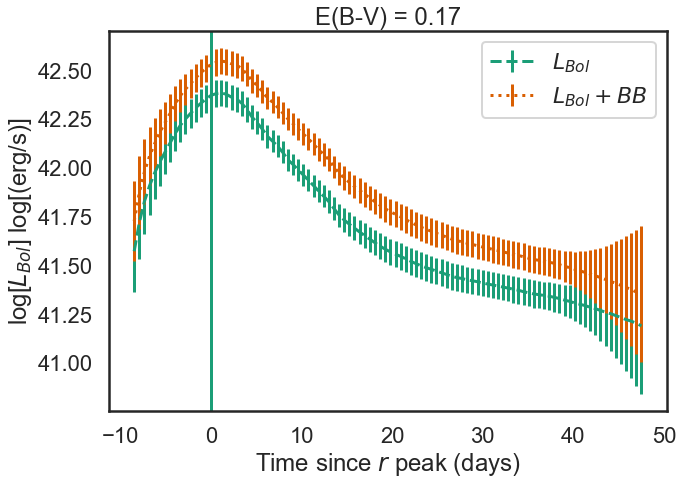

In [230]:
peakTime = 58864.48
sbol_2020oi = pd.read_csv("../data/bol_2020oi_ABgVriz_wErr.txt", delimiter=',')
L_from_bbody_2020oi = pd.read_csv("../data/BB_params_2020oi_ABgVriz.txt", delimiter='\t')
#del sbol_2020oi['Unnamed: 5']
#print(L_from_bbody_2020oi['ph'])
# z~ 0.005251 corresponds to a distance of 22.7 Mpc #Superbol uses 23.3 Mpc!! 
fig = plt.figure(figsize=(10,7)); 
sbol_2020oi['GP_Err'] = bol_std
#sbol_2020oi.to_csv("../data/bol_2020oi_griz_wErr.txt", index=False)
#plt.semilogy(X_new-peakTime, bol_lum, label='Trapezoidal Integration, gps')
plt.errorbar(sbol_2020oi['ph']-peakTime, np.log10(sbol_2020oi['Lobs']),yerr=bol_std, linestyle='--',  label=r'$L_{Bol}$')
plt.errorbar(sbol_2020oi['ph']-peakTime, np.log10(sbol_2020oi['L+BB']), linestyle=':', yerr=bol_std, label=r'$L_{Bol}+BB$')
#plt.errorbar(sbol_2020oi['ph']-peakTime, np.log10(sbol_2020oi['L+BB']), yerr=bol_std, fmt='.')
#plt.plot(L_from_bbody_2020oi['ph']-peakTime, np.log10(L_from_bbody_2020oi['L_bb']), 'o', markersize=5, label='L_bb')
#plt.plot(sbol_2020oi['ph']-peakTime, np.log10(bol_lum), 'o', markersize=5, label='quasi-bol (not k-corrected)')

#plt.plot(sbol_2020oi['ph']-peakTime, np.log10(sbol_2020oi['L+BB']), 'o', markersize=5, label='bol, BB-corrected')
#plt.plot(sbol_2020oi['ph']-peakTime, np.log10(sbol_2020oi['Lobs']), 'o', markersize=5, label='quasibol (k-corrected)')
#plt.plot(sbol_2020oi['ph']-peakTime, np.log10(bol_lum), 'o', markersize=5, label='quasi-bol (not k-corrected)')
#plt.plot(L_from_bbody_2020oi['ph']-peakTime, np.log10(L_from_bbody_2020oi['L_bb']), 'o', markersize=5, label='L_bb')
plt.xlabel(r"Time since $r$ peak (days)");
plt.title("E(B-V) = 0.17")
plt.ylabel(r"log[$L_{Bol}$] log[(erg/s)]");
plt.axvline(x=0)
plt.legend();
#plt.savefig("Bolometric_Lightcurve_2020oi_0210.png")

In [231]:
test = sbol_2020oi['Lobs']
np.where(test == np.nanmax(test))

(array([17]),)

In [232]:
print(sbol_2020oi['ph'].values[17])

58865.62


In [233]:
# from Luca: 
# 11500 (+- 500)  km/s is photospheric velocity at radius

In [234]:
print(np.log10(sbol_2020oi['L+BB'].values[15]))

42.530199698203084


In [51]:
#BBparams_superbol = pd.read_csv("../data/BB_params_2020oi_ABgVriz.txt", delimiter='\t')
BBparams_superbol = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/scripts/superbol_diagnostics/superbol_output_2020oi/BB_params_2020oi_AUBgVriz.txt", delimiter='\t')


Text(0.5, 1.0, '2020oi Blackbody-estimated Temperature')

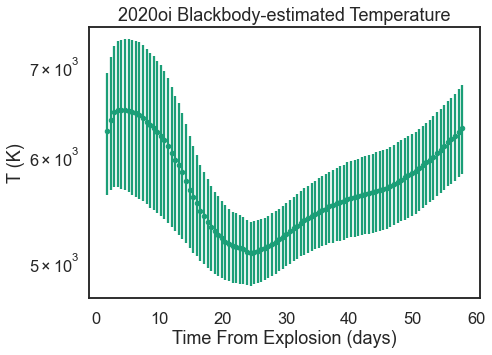

In [52]:
plt.figure(figsize=(7,5))
t0 = 58854.2

plt.errorbar(BBparams_superbol['ph']-t0, BBparams_superbol['T_bb'], yerr=BBparams_superbol['err'], fmt='.', label=r'Superbol');
#plt.plot(BBparams_superbol['ph']-peakTime, BBparams_superbol['T_bb'], '.', label=r'Superbol');
plt.xlabel("Time From Explosion (days)")
plt.ylabel(r"T (K)")
plt.yscale("log")
plt.title("2020oi Blackbody-estimated Temperature")
#plt.legend()
#plt.savefig("Temp_vs_MJD_superbol_new.png", bbox_inches='tight',dpi=300)

In [70]:
rise = BBparams_superbol[BBparams_superbol['ph']<peakTime]

In [71]:
BBparams_superbol['ph']

0     58856.00
1     58856.57
2     58857.13
3     58857.70
4     58858.26
        ...   
95    58909.74
96    58910.30
97    58910.87
98    58911.43
99    58912.00
Name: ph, Length: 100, dtype: float64

In [73]:
t_sec = (rise['ph'].values -  58856.00)*24*3600
r_cm = rise['R_bb'].values
m, b = np.polyfit(rise['ph'].values-t0, r_cm, 1)

In [866]:
m/(3600*24)/2.998e10

NameError: name 'm' is not defined

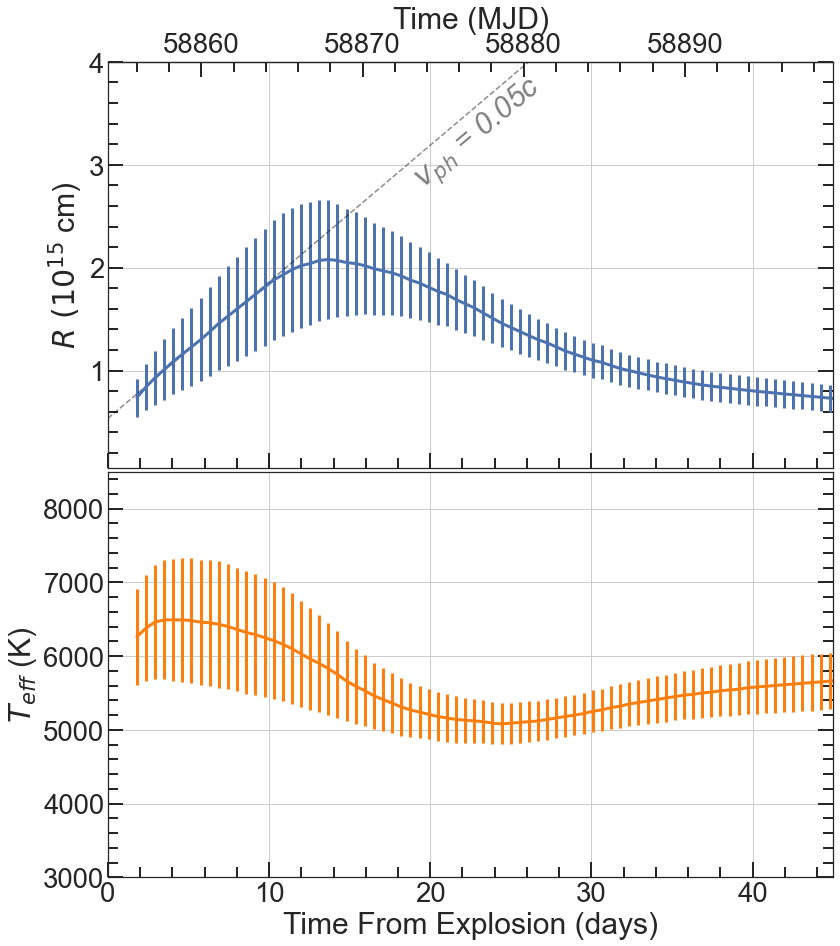

In [589]:
sns.set_context("poster")
sns.set(font_scale=2.5)
sns.set_style('white', {'axes.linewidth': 0.5})
plt.rcParams['xtick.major.size'] = 15
plt.rcParams['ytick.major.size'] = 15

plt.rcParams['xtick.minor.size'] = 10
plt.rcParams['ytick.minor.size'] = 10
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.minor.width'] = 2

plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.bottom'] = True
#plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

xnew = np.linspace(0, 50)

def t0_to_mjd(x):
    return x + t0

def mjd_to_t0(x):
    return x - t0

fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(13,15),sharex=True)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.01)

ax1.errorbar(BBparams_superbol['ph']-t0, BBparams_superbol['R_bb']/1.e15, yerr=BBparams_superbol['err.1']/1.e15, lw=3);
ax2.errorbar(BBparams_superbol['ph']-t0, BBparams_superbol['T_bb'], yerr=BBparams_superbol['err'], lw=3, c='tab:orange');
ax1.plot(xnew, (m*(xnew)+b)/1.e15, 'k--', alpha=0.5)
ax1.text(18.6, 2.8, r"$v_{ph}$ = 0.05c", color='gray', rotation=40, style='italic')
ax1.grid(True)
ax2.grid(True)
ax2.set_xlim((0, 45))
ax2.set_ylim((3000, 8500))
ax1.set_ylim(ymax=4.0)

absMJD = ax1.secondary_xaxis('top', functions=(t0_to_mjd, mjd_to_t0))
absMJD.set_xlabel('Time (MJD)')
    
absMJD.set_xlim((0+t0,45+t0))
#ax1.set_ylim((1.e14/1.e15, 2.e15/1.e15))
ax2.set_xlabel("Time From Explosion (days)")
ax1.set_ylabel(r"$R \ (10^{15}$ cm)");
ax2.set_ylabel(r"$T_{eff}$ (K)");
plt.savefig("/Users/alexgagliano/Documents/Research/2020oi/img/BBody_properties_2020oi_0217.png", bbox_inches='tight',dpi=300)

In [218]:
np.max(BBparams_superbol['R_bb'])

1360000000000000.0

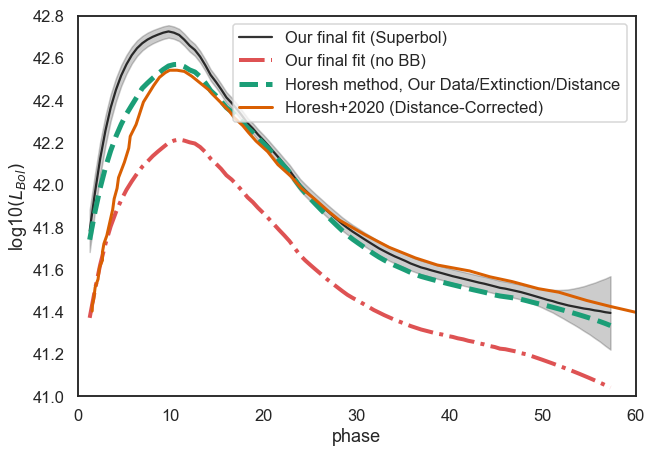

In [208]:
# new ways of estimating the bolometric luminosity, 
# using the bolometric corrections found in 
# https://academic.oup.com/mnras/article/437/4/3848/1011706#equ5
Lbol_20oi_ours = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/data/bol_2020oi_griz_wErr.txt")
df = pd.read_csv("../data/2020oi_griz.txt")
Mbol_20oi_theirs = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/data/Digitized_2020oiLbol_OtherPaper.csv", header=None, names=['phase(days)', 'MBol'])

ebv = 0.173

tStart = 58854.7

##Extinction coefficients in A_lam / E(B-V). Uses York Extinction Solver (http://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/community/YorkExtinctionSolver/coefficients.cgi)
extco = {'u': 4.786,  'g': 3.587, 'r': 2.471, 'i': 1.798,  'z': 1.403, 'y': 1.228, 'Y': 1.228,
         'U': 4.744,  'B': 4.016, 'V': 3.011, 'R': 2.386, 'G': 2.216, 'I': 1.684, 'J': 0.813, 'H': 0.516,
         'K': 0.337, 'S': 8.795, 'D': 9.270, 'A': 6.432,  'F': 8.054,  'N': 8.969, 'o': 2.185, 'c': 3.111}


# Subtract foreground extinction using input E(B-V) and coefficients from YES
df['gmag'] -= extco['g']*ebv
df['rmag'] -= extco['r']*ebv
df['imag'] -= extco['i']*ebv

#convert to absolute magnitude
d = 1.71e7 # 17.1 Mpc, distance to M100 
#d = 1.4e7 # 14 Mpc, distance used in the other paper

M_g = -5*np.log10(d/10) + df['gmag'].values
M_r = -5*np.log10(d/10) + df['rmag'].values
M_i = -5*np.log10(d/10) + df['imag'].values

col_gr = df['gmag'].values-df['rmag'].values
err_gr = np.sqrt(df['gmagerr']**2 + df['rmagerr']**2)
BCg = 0.054 - 0.195*col_gr - 0.719*col_gr**2

M_bol = M_g + BCg

Fsol = 3.83e33 # erg/s/cm
Msol = 4.77

Fbol_20oi = Fsol * 10**((Msol-M_bol)/2.5)


Mbol_20oi_theirs['MBol'] -= 1.0
Fbol_20oi_theirs = Fsol * 10**((Msol-Mbol_20oi_theirs['MBol'].values)/2.5)

plt.figure(figsize=(10,7))
#plt.plot(df['MJD'], df['gmag'], 'o')
#plt.plot(df['MJD'], df['rmag'], 'o')
#plt.plot(df['MJD'], df['imag'], 'o')
#plt.plot(df['MJD'], df['zmag'], 'o')
sns.lineplot(x=Lbol_20oi_ours['ph']-tStart, y=np.log10(Lbol_20oi_ours['L+BB']), ms=1, alpha=0.8,color='k', label='Our final fit (Superbol)')
sns.lineplot(x=Lbol_20oi_ours['ph']-tStart, y=np.log10(Lbol_20oi_ours['Lobs']), ms=1, alpha=0.8,color='tab:red', ls='-.', label='Our final fit (no BB)', lw=4)
plt.fill_between(Lbol_20oi_ours['ph']-tStart, np.log10(Lbol_20oi_ours['L+BB'])-Lbol_20oi_ours['GP_Err']/2,np.log10(Lbol_20oi_ours['L+BB'])+Lbol_20oi_ours['GP_Err']/2, alpha=0.2,color='k')
plt.plot(df['MJD']-tStart,np.log10(Fbol_20oi), '--', label='Horesh method, Our Data/Extinction/Distance', lw=5)
plt.plot(Mbol_20oi_theirs['phase(days)'], np.log10(Fbol_20oi_theirs*(17.1/14.)**2), lw=3, label='Horesh+2020 (Distance-Corrected)')
plt.xlim((0, 60))
plt.ylim((41, 42.8))
plt.ylabel(r"log10$(L_{Bol})$")
plt.xlabel("phase")
plt.legend()

In [196]:
np.log10(Lbol_20oi_ours['err'])/2

0     20.012653
1     20.086593
2     20.151598
3     20.206650
4     20.251214
        ...    
95    19.879077
96    19.877174
97    19.876024
98    19.875254
99    19.874481
Name: err, Length: 100, dtype: float64

In [193]:
Lbol_20oi_ours

ph          Lobs           err          L+BB         err.1    GP_Err
0   58856.00  2.350000e+41  1.060000e+40  6.060000e+41  3.470000e+41  0.199788
1   58856.57  3.190000e+41  1.490000e+40  9.190000e+41  5.490000e+41  0.178537
2   58857.13  4.190000e+41  2.010000e+40  1.330000e+42  8.330000e+41  0.158986
3   58857.70  5.270000e+41  2.590000e+40  1.810000e+42  1.200000e+42  0.141193
4   58858.26  6.370000e+41  3.180000e+40  2.320000e+42  1.590000e+42  0.125211
..       ...           ...           ...           ...           ...       ...
95  58909.74  1.220000e+41  5.730000e+39  2.580000e+41  1.300000e+41  0.236778
96  58910.30  1.190000e+41  5.680000e+39  2.550000e+41  1.300000e+41  0.262202
97  58910.87  1.160000e+41  5.650000e+39  2.530000e+41  1.290000e+41  0.289160
98  58911.43  1.130000e+41  5.630000e+39  2.500000e+41  1.290000e+41  0.317571
99  58912.00  1.100000e+41  5.610000e+39  2.480000e+41  1.280000e+41  0.347352

[100 rows x 6 columns]

In [180]:
Fbol_20oi_ourVals = np.log10(Fbol_20oi)

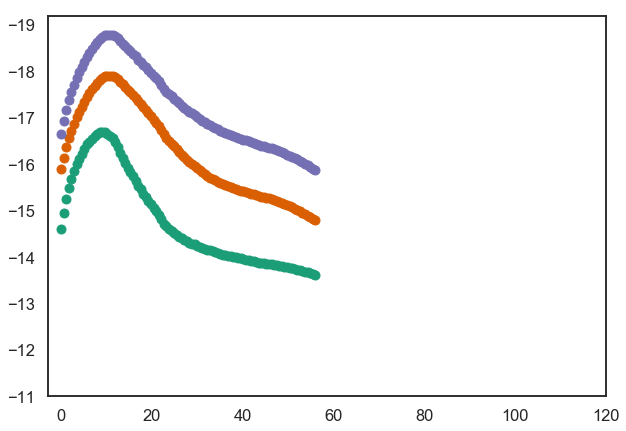

In [127]:
plt.figure(figsize=(10,7))
plt.plot(df['MJD']-df['MJD'].values[0], M_g, 'o')
plt.plot(df['MJD']-df['MJD'].values[0], M_r-1, 'o')
plt.plot(df['MJD']-df['MJD'].values[0], M_i-2, 'o')
plt.xlim((-3, 120))
plt.ylim((-19.2, -11))
plt.gca().invert_yaxis()

In [305]:
#distance modulus uncertainty
d = 1.71e7 #mpc
dL = 1.4e7 #mpc
dH = 2.0e7 #mpc
print(5*np.log10(d/10)) #pc
lowbar = 5*np.log10(d/10) - 5*np.log10(dL/10) #pc
highbar = 5*np.log10(dH/10) - 5*np.log10(d/10) #pc

31.16498055196077


In [307]:
print(lowbar)
print(highbar)

0.43434037356957944
0.34016942635913594
